In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
filepath = r'C:\Users\wailb\Downloads\gsearch_jobs.csv'

data = pd.read_csv(filepath)

In [3]:
pd.options.display.max_columns = 100  

data

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'aws', 'tableau']"
1,1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['azure', 'sql', 'excel']"
3,3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42146,42146,524,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,23 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-04 03:40:23.706734,United States,NaN,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['snowflake', 'sql', 'excel', 'tableau', 'powe..."
42147,42147,525,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-11-24 04:00:08.710801,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
42148,42148,526,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-07 04:00:12.563831,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
42149,42149,527,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42151 entries, 0 to 42150
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42151 non-null  int64  
 1   index                42151 non-null  int64  
 2   title                42151 non-null  object 
 3   company_name         42151 non-null  object 
 4   location             42122 non-null  object 
 5   via                  42142 non-null  object 
 6   description          42151 non-null  object 
 7   extensions           42151 non-null  object 
 8   job_id               42151 non-null  object 
 9   thumbnail            25015 non-null  object 
 10  posted_at            42151 non-null  object 
 11  schedule_type        41974 non-null  object 
 12  work_from_home       19077 non-null  object 
 13  salary               7220 non-null   object 
 14  search_term          42151 non-null  object 
 15  date_time            42151 non-null 

In [5]:
# 1. Handling missing values in 'location' with the most frequent category
if 'location' in data.columns:
    data['location'].fillna(data['location'].mode()[0], inplace=True)

# 2. Handling 'thumbnail' and by imputing a placeholder for missing (for visualization purposes)
if 'thumbnail' in data.columns:
    data['thumbnail'].fillna('No Thumbnail', inplace=True)
    
# 3. Dropping 'commute_time' due to 100% missing values
data.drop(columns=['commute_time'], inplace=True, errors='ignore')

# 4. Dopping "Unnamed: 0" and setting "index" feature as index
data.drop(columns=["Unnamed: 0"] , inplace=True, errors='ignore')
data.set_index("index", inplace = True)

data.head()

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
index,,,,,,,,,,,,,,,,,,,,,,,,
0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'aws', 'tableau']"
1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,No Thumbnail,3 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['azure', 'sql', 'excel']"
3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,No Thumbnail,23 hours ago,Contractor,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,No Thumbnail,20 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint']"


In [6]:
#due to our data natue and the lack of informations, we will not handle missing vallues in salary features

In [7]:
data.describe()

,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,7220.000000,6834.000000,6834.000000,4652.000000,2549.000000,7220.000000
mean,35857.934650,29975.814719,42533.727485,41.545042,101433.199708,91734.519919
std,52063.182492,43607.296686,61653.133972,22.977756,32088.872591,43514.863879
min,7.250000,8.000000,10.000000,7.250000,29289.840000,15080.000000
25%,30.000000,18.330000,42.000000,23.605000,80000.000000,62400.000000
50%,57.500000,40.000000,75.000000,34.500000,96500.000000,88400.000000
75%,85000.000000,74042.750000,100000.000000,57.500000,112500.000000,116700.000000
max,300000.000000,275000.000000,346000.000000,300.000000,300000.000000,624000.000000


C:\Users\wailb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


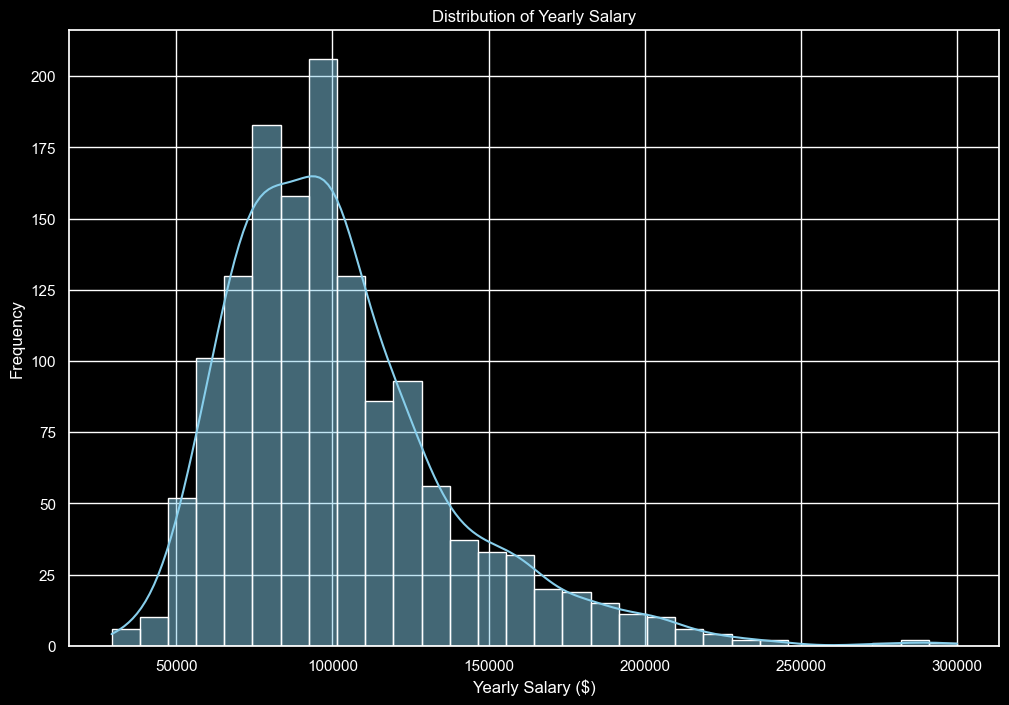

In [8]:
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Removing duplicate values based on "title" and "company_name" before plotting the histogram of "salary_yearly"
data_unique = data.drop_duplicates(subset=['title', 'company_name'])

plt.figure(figsize=(12, 8))
sns.histplot(data_unique['salary_yearly'].dropna(), bins=30, kde=True, color="skyblue")
plt.title('Distribution of Yearly Salary')
plt.xlabel('Yearly Salary ($)')
plt.ylabel('Frequency')
plt.show()

C:\Users\wailb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


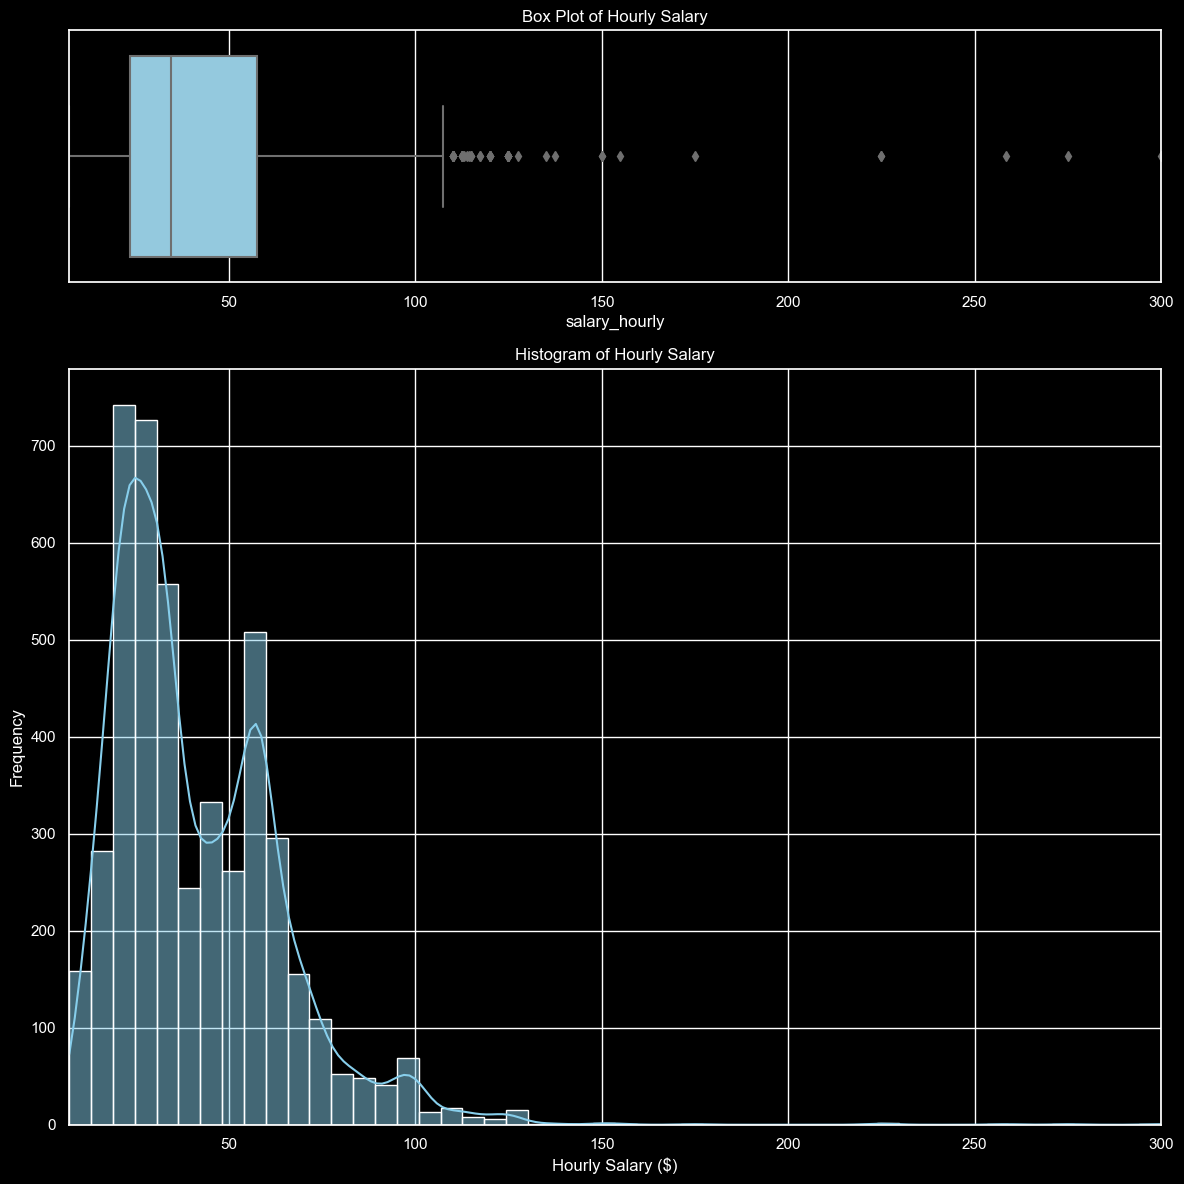

In [9]:
#This combination allows us to visualize the distribution alongside summary statistics

fig, axs = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(x=data['salary_hourly'], ax=axs[0], color="skyblue")
sns.histplot(data['salary_hourly'].dropna(), bins=50, kde=True, ax=axs[1], color="skyblue")

# Adjusting the x-axis limits to be similar for both plots
min_salary, max_salary = data['salary_hourly'].min(), data['salary_hourly'].max()
axs[0].set_xlim(min_salary, max_salary)
axs[1].set_xlim(min_salary, max_salary)

axs[0].set_title('Box Plot of Hourly Salary')
axs[1].set_title('Histogram of Hourly Salary')
axs[1].set_xlabel('Hourly Salary ($)')
axs[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

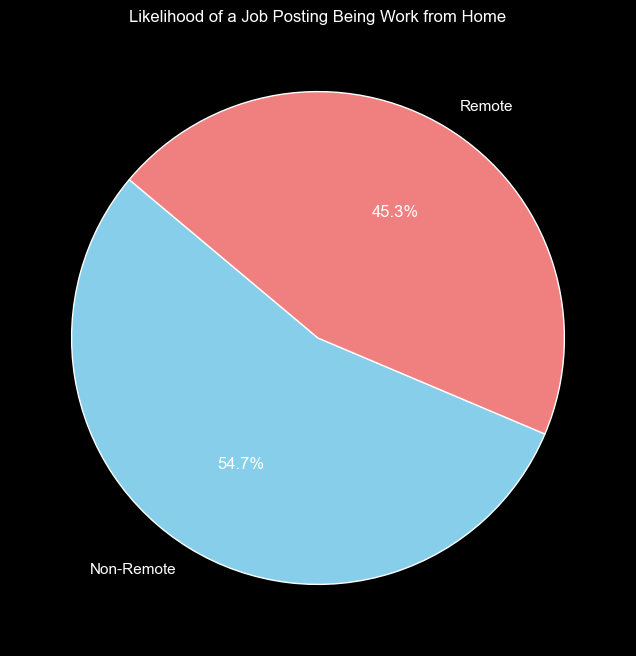

In [10]:
# Filling NaN values with False to consider them as non-remote jobs
data['work_from_home_filled'] = data['work_from_home'].fillna(False)

work_from_home_filled_counts = data['work_from_home_filled'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(work_from_home_filled_counts, labels=work_from_home_filled_counts.index.map({True: 'Remote', False: 'Non-Remote'}), autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Likelihood of a Job Posting Being Work from Home')
plt.show()

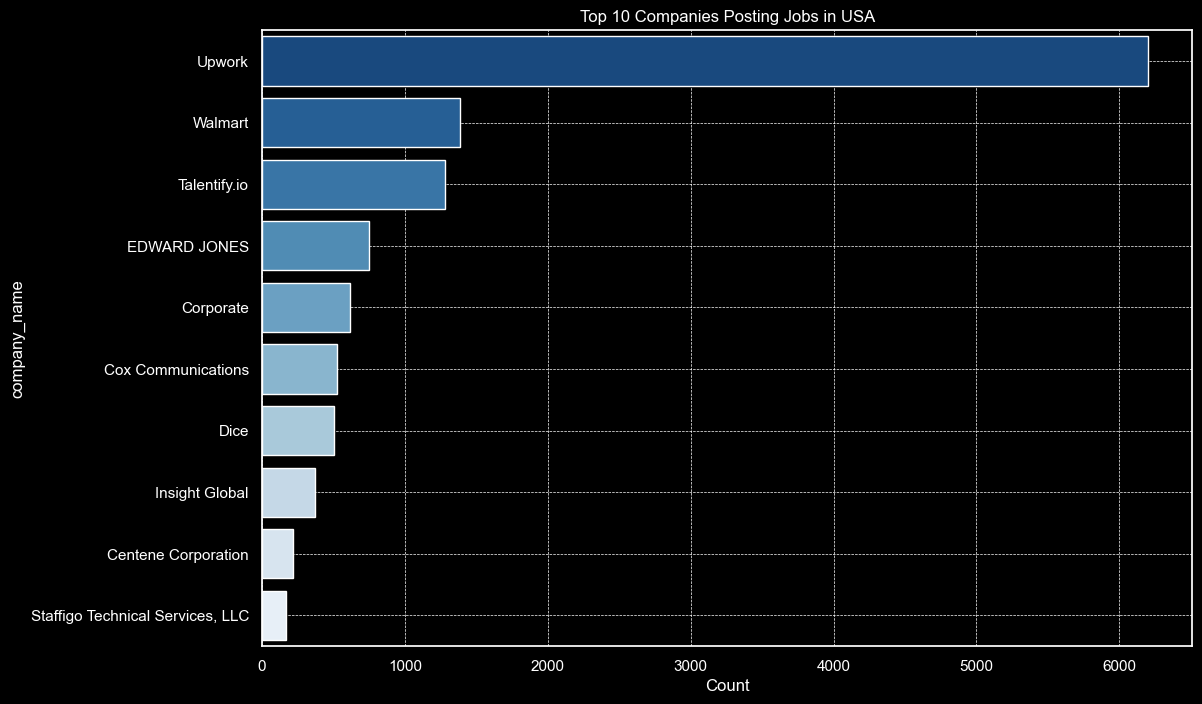

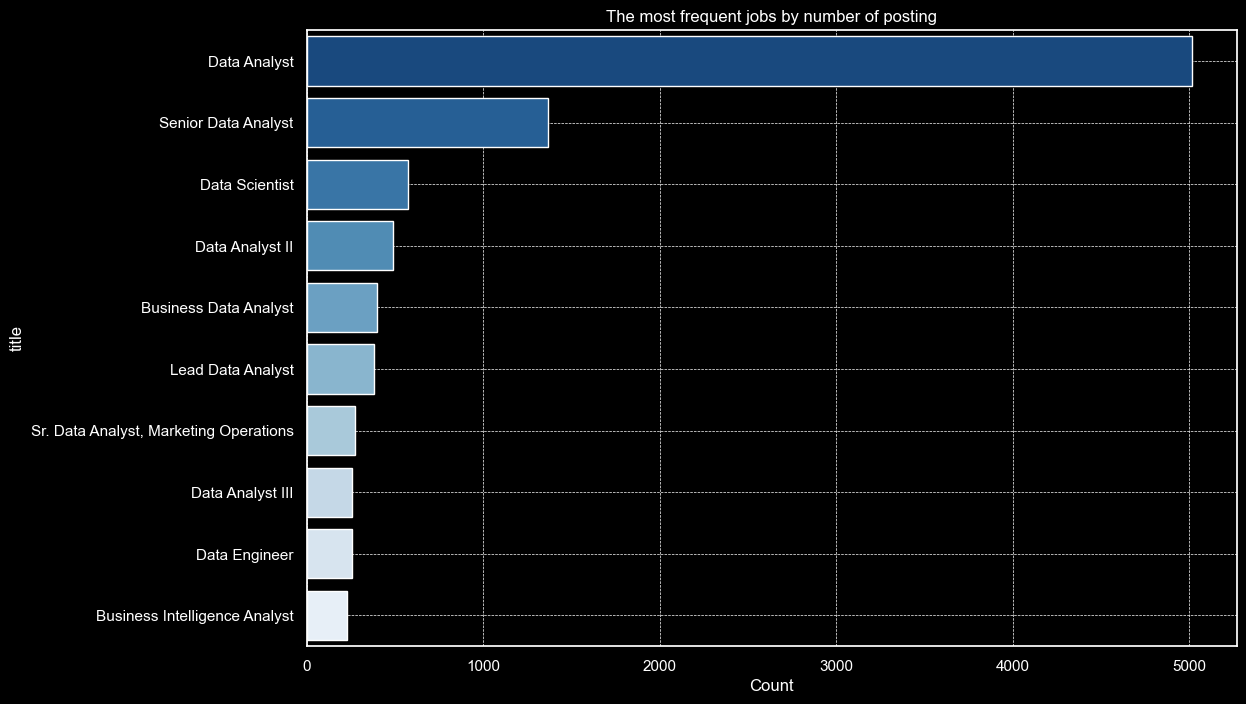

In [11]:
def plot_top_n_categories(data, column, title, n=10, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    top_n = data[column].value_counts().head(n)
    sns.barplot(x=top_n.values, y=top_n.index, palette="Blues_r")
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Plotting bar charts for Top 10 Companies, and Job Titles
plot_top_n_categories(data, 'company_name', 'Top 10 Companies Posting Jobs in USA')
plot_top_n_categories(data, 'title', 'The most frequent jobs by number of posting')

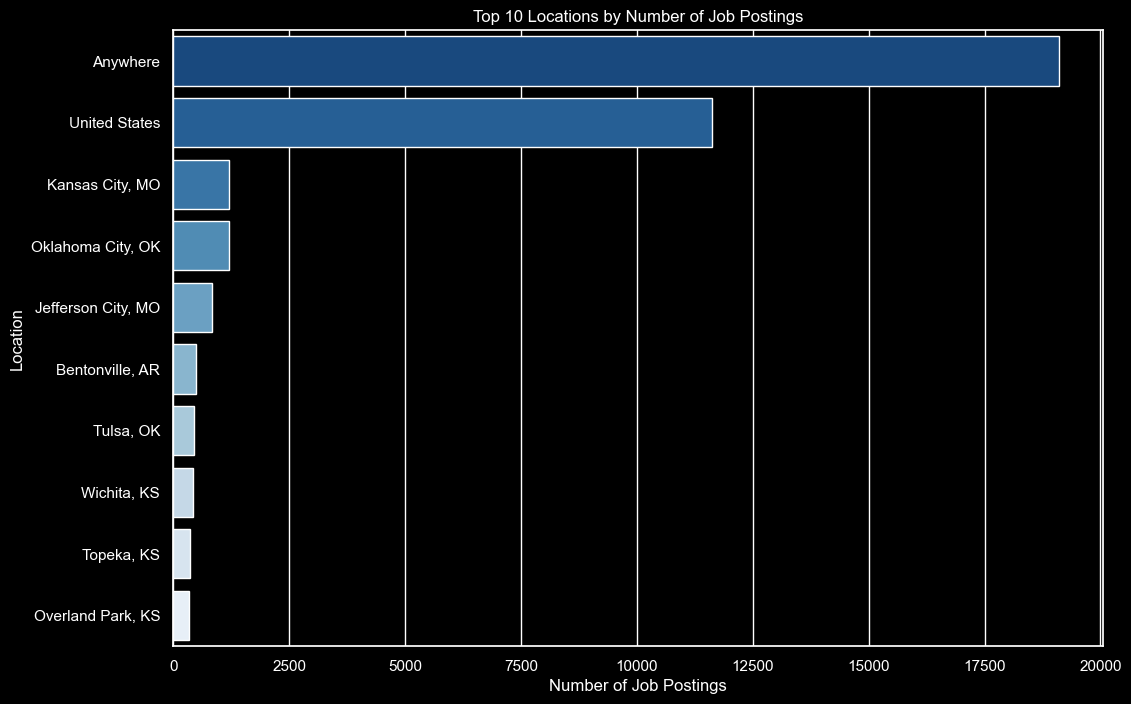

In [12]:
# Cleaning 'location' column by trimming leading/trailing spaces
data['location_cleaned'] = data['location'].str.strip()

# Recounting the number of job postings for each location with spaces removed, and plotting the top 10 locations again
location_counts_updated = data['location_cleaned'].value_counts().head(10)

# Plotting the updated top 10 locations
plt.figure(figsize=(12, 8))
sns.barplot(y=location_counts_updated.index, x=location_counts_updated.values, palette="Blues_r")
plt.title('Top 10 Locations by Number of Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()

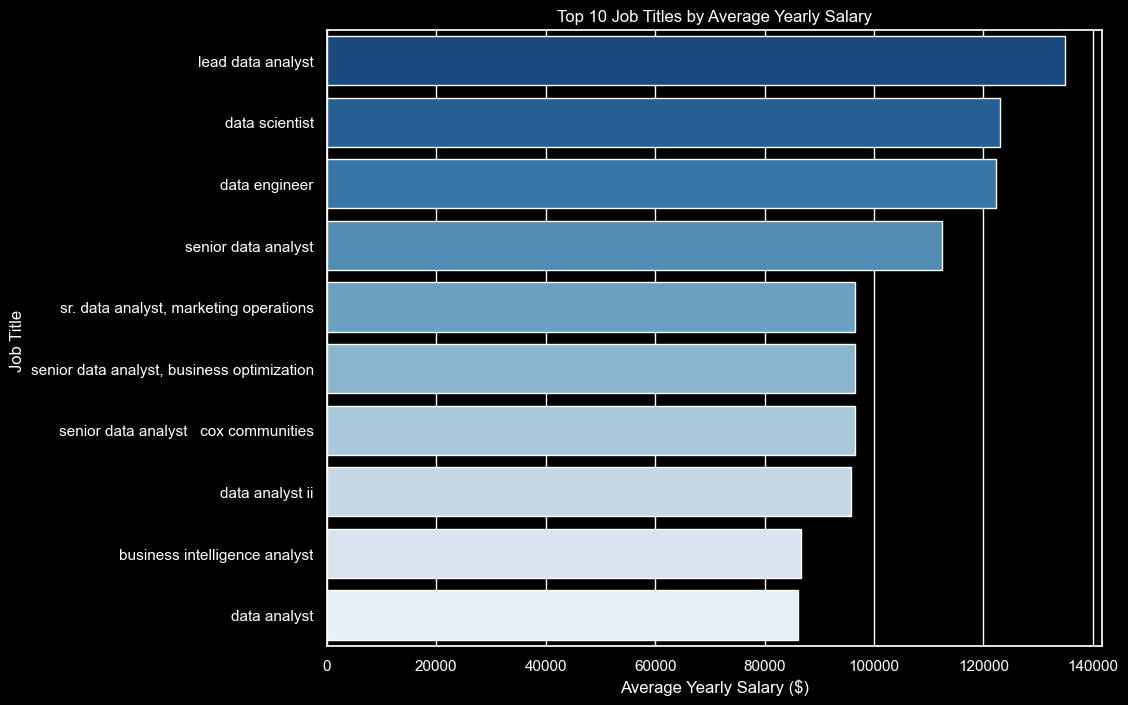

In [13]:
#Cleaning 'title' column by spacing
data['title_standardized'] = data['title'].str.replace('-', ' ').str.lower()

# Re-filtering the dataset for entries with yearly salary data using standardized job titles
standardized_yearly_salary_data = data[data['salary_yearly'].notnull()]

# Finding the top 10 most common standardized job titles that include yearly salary data and calculating their average salary
top_standardized_titles_yearly_salary = standardized_yearly_salary_data.groupby('title_standardized')['salary_yearly'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)

# Sorting these top titles by average yearly salary in descending order for visualization
top_standardized_titles_yearly_salary_desc = top_standardized_titles_yearly_salary.sort_values(by='mean', ascending=False)

# Plotting the average yearly salary for these top standardized job titles
plt.figure(figsize=(10, 8))
sns.barplot(x=top_standardized_titles_yearly_salary_desc['mean'], y=top_standardized_titles_yearly_salary_desc.index, palette='Blues_r')
plt.title('Top 10 Job Titles by Average Yearly Salary')
plt.xlabel('Average Yearly Salary ($)')
plt.ylabel('Job Title ')
plt.show()

Text(0, 0.5, 'Job Platform ')

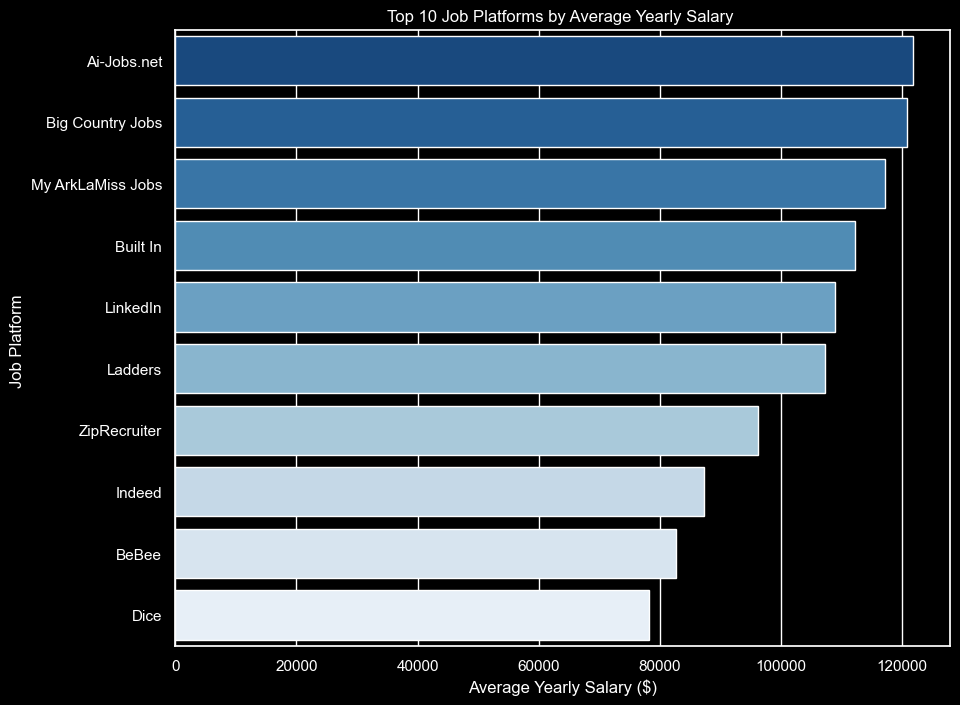

In [14]:
sns.set(style="darkgrid")
plt.style.use("dark_background")

#Cleaning 'via' column by spacing
data['via_cleaned'] = data['via'].str.replace('via ', '')


# Filtering the dataset for entries with yearly salary data
yearly_salary_data_cleaned = data[data['salary_yearly'].notnull()]

# Grouping by the cleaned 'via' column to calculate the count and mean of yearly salary
top_platforms_yearly_salary_cleaned = yearly_salary_data_cleaned.groupby('via_cleaned')['salary_yearly'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
top_platforms_yearly_salary_cleaned_desc = top_platforms_yearly_salary_cleaned.sort_values(by='mean', ascending=False)


# Plotting the average yearly salary for the top 10 job platforms with cleaned data
plt.figure(figsize=(10, 8))
sns.barplot(x='mean', y=top_platforms_yearly_salary_cleaned_desc.index, data=top_platforms_yearly_salary_cleaned_desc, palette='Blues_r')
plt.title('Top 10 Job Platforms by Average Yearly Salary ')
plt.xlabel('Average Yearly Salary ($)')
plt.ylabel('Job Platform ')


C:\Users\wailb\AppData\Local\Temp\ipykernel_20328\3387269886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sql_requests['date_time'] = pd.to_datetime(sql_requests['date_time'], errors='coerce')
C:\Users\wailb\AppData\Local\Temp\ipykernel_20328\3387269886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sql_requests['month_year'] = sql_requests['date_time'].dt.to_period('M')


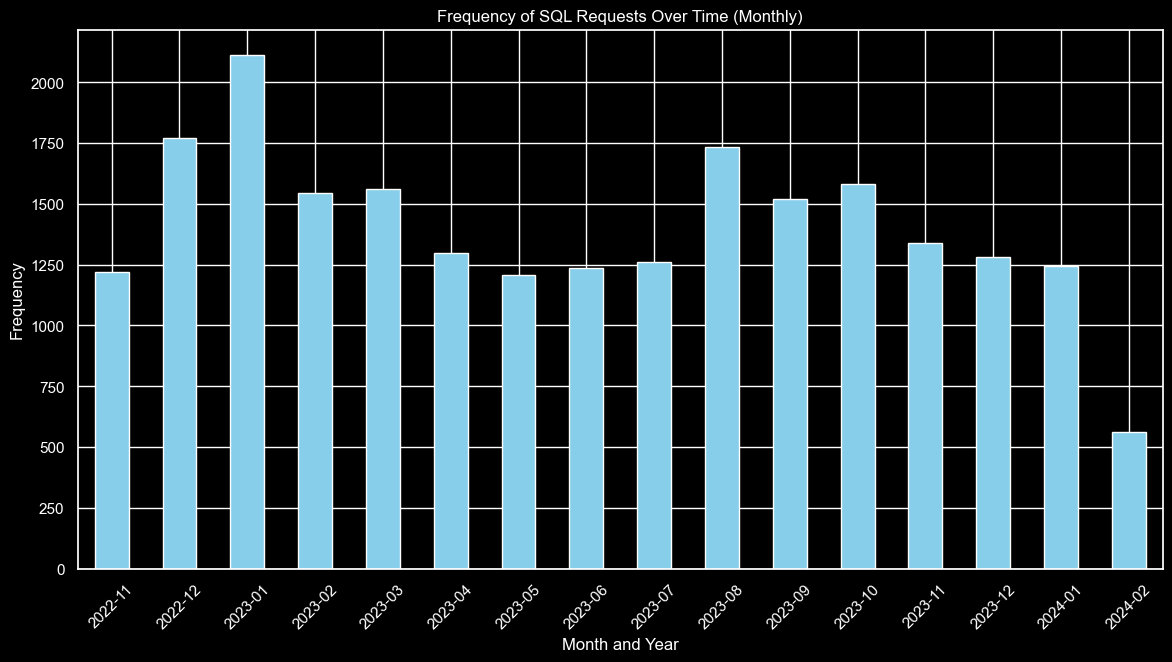

In [15]:
sql_requests = data[data['title'].str.lower().str.contains('sql') | data['description'].str.lower().str.contains('sql')]

sql_requests['date_time'] = pd.to_datetime(sql_requests['date_time'], errors='coerce')
sql_requests['month_year'] = sql_requests['date_time'].dt.to_period('M')

sql_requests_frequency = sql_requests['month_year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
sql_requests_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of SQL Requests Over Time (Monthly)')
plt.xlabel('Month and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


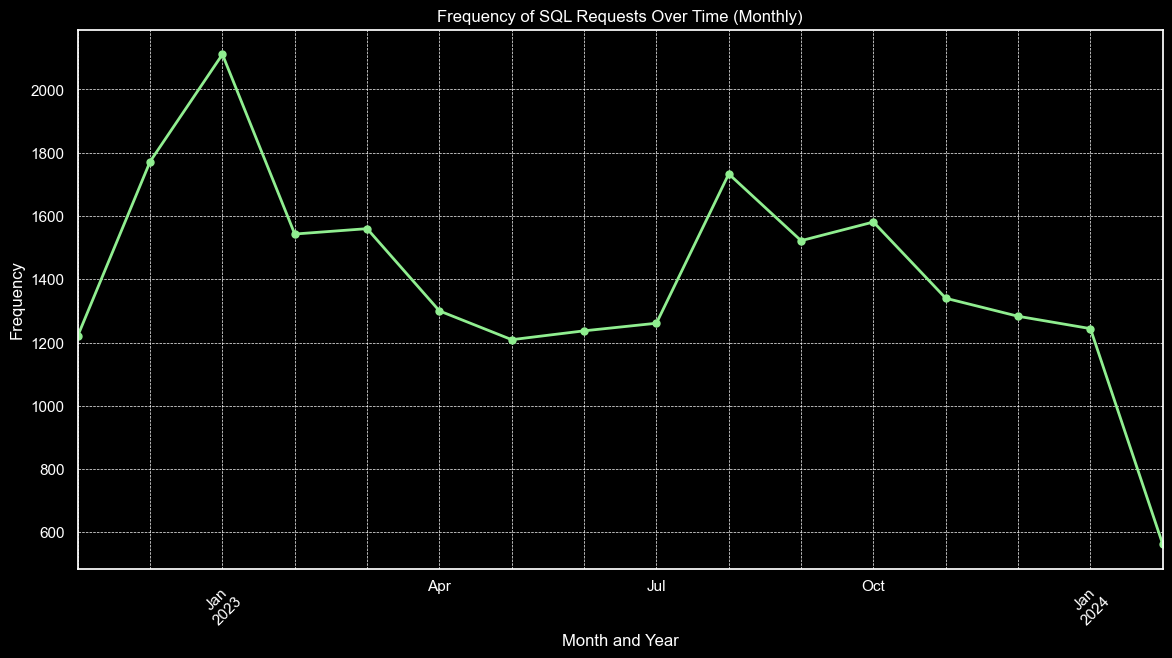

In [16]:
plt.figure(figsize=(14, 7))
sql_requests_frequency.plot(kind='line', color='lightgreen', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Frequency of SQL Requests Over Time (Monthly)')
plt.xlabel('Month and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\wailb\AppData\Local\Temp\ipykernel_20328\1874351092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titles_filtered['title_simple'] = data_titles_filtered['title'].str.lower()


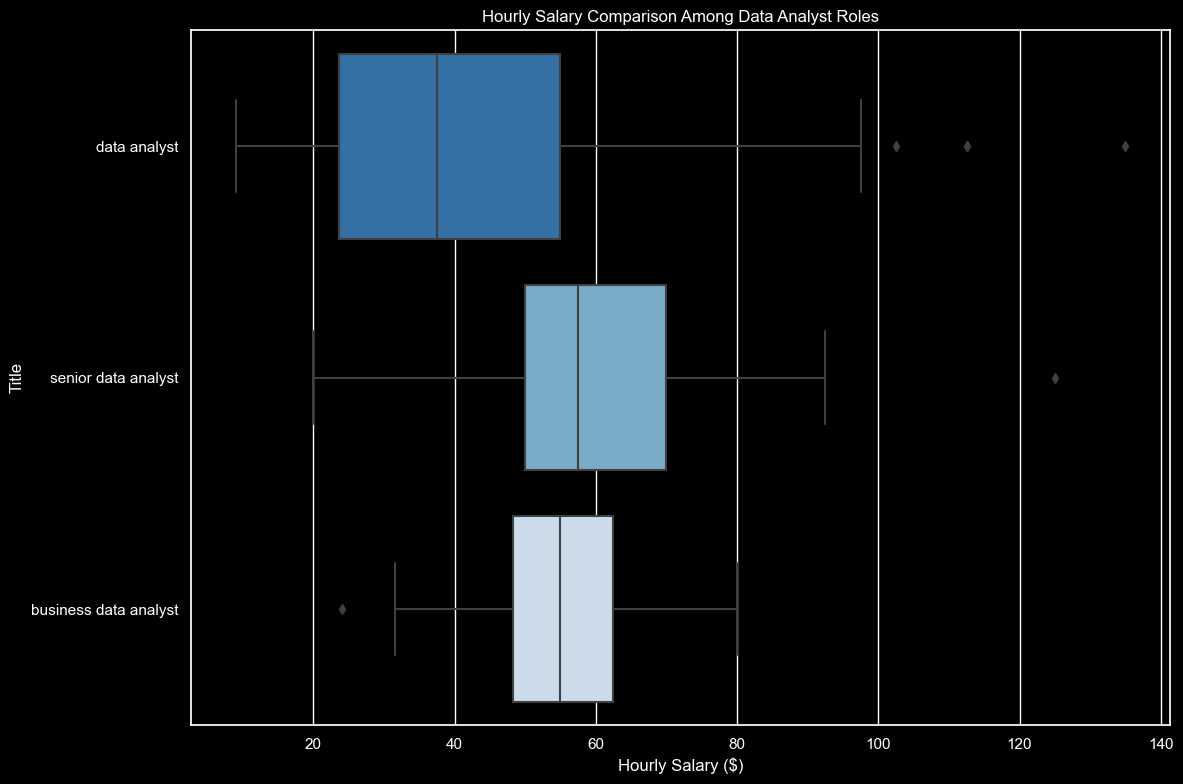

In [17]:
titles_filter = data['title'].str.lower().isin(['data analyst', 'business data analyst', 'senior data analyst'])
data_titles_filtered = data[titles_filter]

# Adjusting the title for accurate representation in the plot
data_titles_filtered['title_simple'] = data_titles_filtered['title'].str.lower()

# Creating the box plot again
plt.figure(figsize=(12, 8))
sns.boxplot(x='salary_hourly', y='title_simple', data=data_titles_filtered, palette="Blues_r")
plt.title('Hourly Salary Comparison Among Data Analyst Roles')
plt.xlabel('Hourly Salary ($)')
plt.ylabel('Title')
plt.tight_layout()
plt.show()

In [1]:
data.to_csv(r"C:\Users\wailb\Desktop\IronHack LABS\mini-project-jobs\mini_project_ww.csv")

NameError: name 'data' is not defined

## _SECOND PART OF THE PROJECT_ : ML / Building Predictive Model

Predicting Yearly salary based on (Job Location/Platform/Y.salary)


In [2]:
## re-importing the data-set

import pandas as pd

filepath = r'C:\Users\wailb\Downloads\gsearch_jobs.csv'

data = pd.read_csv(filepath)

In [3]:
# Step 1: Handle Missing Values

# Droping rows where 'salary_yearly' is NaN
data_cleaned = data.dropna(subset=['salary_yearly'])

# Imputing missing values for 'title', 'via', and 'location'
# For simplicity, we'll use the mode (the most frequent value) for each column to impute missing values
for column in ['title', 'via', 'location']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(value=mode_value, inplace=True)

# Displaying the shape of the dataset after cleaning and the first few rows to verify changes
data_cleaned.shape


C:\Users\wailb\AppData\Local\Temp\ipykernel_13152\3964937755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column].fillna(value=mode_value, inplace=True)


(2549, 27)

In [4]:
from nltk.stem import PorterStemmer
import re

# Initializing the Porter Stemmer
stemmer = PorterStemmer()

# Writing the function to clean and stem text data
def clean_and_stem(text, stem=False):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Steming each word
    if stem:
        text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Standardizing Job Title: normalize text and optionally apply stemming
data_cleaned['title'] = data_cleaned['title'].apply(lambda x: clean_and_stem(x, stem=True))

# Standardizing Job Platform (via): normalize text
data_cleaned['via'] = data_cleaned['via'].apply(lambda x: clean_and_stem(x)).str.replace('via ', '')

# Standardizing Job Location: here, we'll simplify by categorizing as "remote" if "anywhere" is found, or leave as is for simplicity
data_cleaned['location'] = data_cleaned['location'].apply(lambda x: 'remote' if 'anywhere' in x.lower() else x.strip().lower())

# Displaying the first few rows to verify the changes
data_cleaned.head()


C:\Users\wailb\AppData\Local\Temp\ipykernel_13152\2203648702.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['title'] = data_cleaned['title'].apply(lambda x: clean_and_stem(x, stem=True))
C:\Users\wailb\AppData\Local\Temp\ipykernel_13152\2203648702.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['via'] = data_cleaned['via'].apply(lambda x: clean_and_stem(x)).str.replace('via ', '')
C:\Users\wailb\AppData\Local\Temp\ipykernel_13152\2203648702.py:25: SettingWithCopyWarning:

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
5,5,5,data analyst,Marathon TS,remote,linkedin,Marathon TS is seeking a Data Analyst to suppo...,"['9 hours ago', '80K–90K a year', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,80K–90K,a year,85000.0,80000.0,90000.0,NaN,85000.0,85000.0,[]
76,76,76,financi data guru sqlexcel,Mastermind.com,united states,linkedin,🚀 JOIN AN AMAZING COMPANY AND GLOBALLY RECOGNI...,"['10 hours ago', '90K–110K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJGaW5hbmNpYWwgRGF0YSBHdXJ1IC...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['sql', 'excel', 'spark', 'spreadsheet']"
138,138,138,data analyst,Meta,remote,linkedin,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['r', 'python', 'sql', 'tableau']"
142,142,142,data analyst workforc manag,Krispy Kreme,united states,linkedin,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['excel', 'outlook', 'powerpoint', 'word']"
152,152,152,midlevel claim data analyst,CIBA Insurance Services,united states,ksnt jobs,"Established in 1993, CIBA Insurance Services o...","['10 hours ago', '90K–130K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJNaWQtbGV2ZWwgQ2xhaW1zIERhdG...,NaN,...,NaN,90K–130K,a year,110000.0,90000.0,130000.0,NaN,110000.0,110000.0,"['sql', 'excel', 'mssql', 'ssrs']"


In [5]:
# Defining categories and keywords for mapping
categories = {
    'Senior Data Analyst': ['senior data analyst'],
    'Data Analyst': ['data analyst', 'analyst'],
    'Senior Business Analyst': ['senior business analyst'],
    'Business Analyst': ['business analyst'],
    'Senior Data Scientist': ['senior data scientist'],
    'Data Scientist': ['data scientist', 'scientist'],
    'Senior Engineer': ['senior engineer', 'senior developer'],
    'Engineer': ['engineer', 'developer', 'software', 'data engineer'],
    'Others': []  # Default, if no keywords match
}


# Function to categorize job titles based on keywords
def categorize_title(title):
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Others'  # Default category if no keywords match

# Applying categorization to job titles
data_cleaned['job_category'] = data_cleaned['title'].apply(categorize_title)

# Displaying the distribution of job categories to verify the categorization
data_cleaned['job_category'].value_counts()


C:\Users\wailb\AppData\Local\Temp\ipykernel_13152\791082842.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['job_category'] = data_cleaned['title'].apply(categorize_title)


job_category
Data Analyst             1870
Senior Data Analyst       301
Others                    238
Data Scientist            118
Senior Data Scientist      18
Engineer                    4
Name: count, dtype: int64

In [24]:
# Displaying the cleaned data

data_cleaned

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,job_category
5,5,5,data analyst,Marathon TS,remote,linkedin,Marathon TS is seeking a Data Analyst to suppo...,"['9 hours ago', '80K–90K a year', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,80K–90K,a year,85000.0,80000.0,90000.0,NaN,85000.0,85000.0,[],Data Analyst
76,76,76,financi data guru sqlexcel,Mastermind.com,united states,linkedin,🚀 JOIN AN AMAZING COMPANY AND GLOBALLY RECOGNI...,"['10 hours ago', '90K–110K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJGaW5hbmNpYWwgRGF0YSBHdXJ1IC...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['sql', 'excel', 'spark', 'spreadsheet']",Others
138,138,138,data analyst,Meta,remote,linkedin,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['r', 'python', 'sql', 'tableau']",Data Analyst
142,142,142,data analyst workforc manag,Krispy Kreme,united states,linkedin,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['excel', 'outlook', 'powerpoint', 'word']",Data Analyst
152,152,152,midlevel claim data analyst,CIBA Insurance Services,united states,ksnt jobs,"Established in 1993, CIBA Insurance Services o...","['10 hours ago', '90K–130K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJNaWQtbGV2ZWwgQ2xhaW1zIERhdG...,NaN,...,90K–130K,a year,110000.0,90000.0,130000.0,NaN,110000.0,110000.0,"['sql', 'excel', 'mssql', 'ssrs']",Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42146,42146,524,market data bi analyst ii,EDWARD JONES,"houstonia, mo",my arklamiss jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,...,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['snowflake', 'sql', 'excel', 'tableau', 'powe...",Data Analyst
42147,42147,525,leaddata analyst,EDWARD JONES,"marshfield, mo",my arklamiss jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],Data Analyst
42148,42148,526,leaddata analyst,EDWARD JONES,"high point, mo",my arklamiss jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],Data Analyst
42149,42149,527,leaddata analyst,EDWARD JONES,"calhoun, mo",my arklamiss jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],Data Analyst


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Selecting relevant columns
relevant_data = data[['title', 'via', 'location', 'salary_yearly']].copy()

# Dropping rows with missing salary_yearly, if any
relevant_data.dropna(subset=['salary_yearly'], inplace=True)

# One-Hot Encoding of categorical variables
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(relevant_data[['title', 'via', 'location']])

# Preparing the features and target variable
X = encoded_features
y = relevant_data['salary_yearly'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)



mae, rmse, r2


(16786.723724263116, 26792.561566397755, 0.31238420503993747)

In [8]:
## Considering the complexity of salary prediction
## The score metrics suggest a 31.2% of the variance in yearly salaries is explained by the model
## We will use another Model : Ridge Regression, which adds a penalty on the size of coefficients to prevent overfitting.

In [9]:
from sklearn.linear_model import RidgeCV

# Defining a range of alpha values for Ridge Regression
alphas = np.logspace(-6, 6, 13)

# Initializing the RidgeCV model, which will perform cross-validation to find the best alpha
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)

# Training the model on the training data
ridge_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

best_alpha = ridge_model.alpha_

mae_ridge, rmse_ridge, r2_ridge, best_alpha


(16462.587014810062, 26048.506629698877, 0.35004538826263853, 0.1)

In [10]:
## This model shows an improvement in terms of r2 (35.3% of the variance in yearly salaries is explained by the model)
## The selected alpha value of 1.0 strikes a balance between model complexity and regularization strength.

In [12]:
## Trying another approch : hyperparameter tuning with RandomizedSearchCV

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Initializing the model
rf = RandomForestRegressor(random_state=42)

# Initialize the Randomized Search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fitting the Randomized Search to the data
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters:", best_params_random)
print("Best Score:", best_score_random)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50}
Best Score: 0.32586323102731274


In [23]:
## After Hyperparameter tuning, the models tested before suggest the lack of data
## In this scenario we would wait until we collect more data about the relevant features, then apply Machine Learning